<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv", names=["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"])

## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [3]:
# Number of times pregnant
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skinfold thickness (mm)
# 2-Hour serum insulin (mu U/ml)
# Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age (years)
print(df.shape)
df.head()

(768, 9)


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [4]:
df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

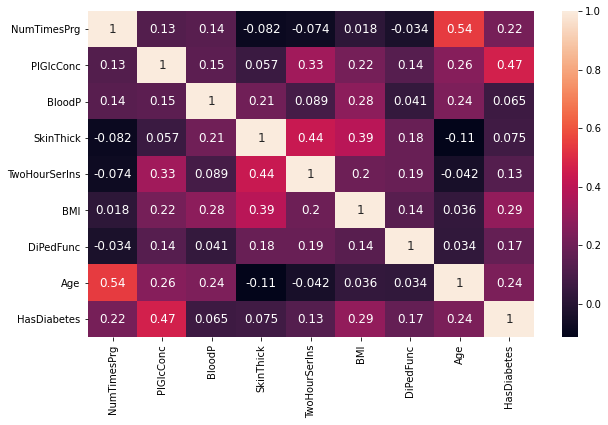

In [5]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":12})
plt.show()

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [6]:
# pd.set_option('display.max_rows', None)
colummn = df.corr()["HasDiabetes"].drop(labels="HasDiabetes").idxmax()
df[colummn]

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

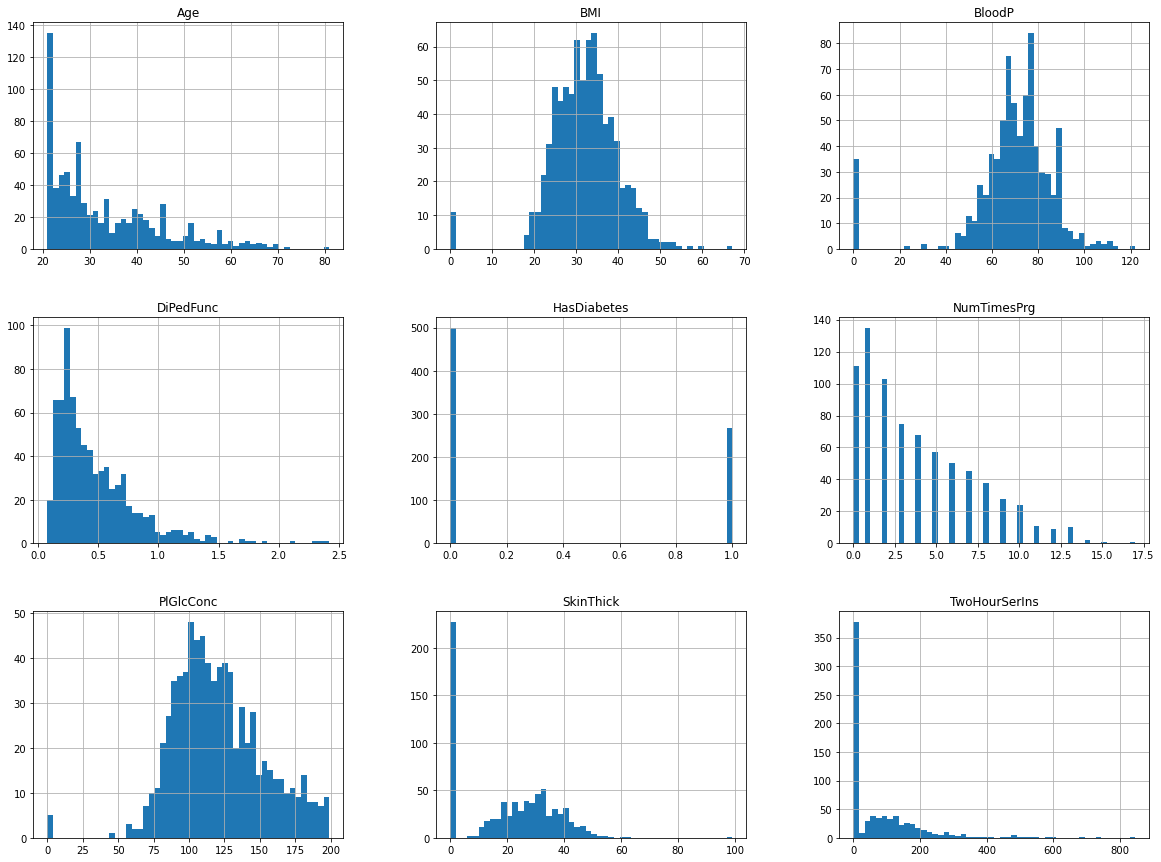

In [7]:
order_columns = df.columns.sort_values()
df.hist(column=order_columns, bins=50, figsize=(20,15))
plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NumTimesPrg    768 non-null    int64  
 1   PlGlcConc      768 non-null    int64  
 2   BloodP         768 non-null    int64  
 3   SkinThick      768 non-null    int64  
 4   TwoHourSerIns  768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DiPedFunc      768 non-null    float64
 7   Age            768 non-null    int64  
 8   HasDiabetes    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
new_df = df.copy()
temp_cols = ["BMI", "BloodP", "PlGlcConc", "SkinThick", "TwoHourSerIns"]
new_df[temp_cols] = new_df[temp_cols].replace(0, np.nan)
new_df.isnull().sum()

NumTimesPrg        0
PlGlcConc          5
BloodP            35
SkinThick        227
TwoHourSerIns    374
BMI               11
DiPedFunc          0
Age                0
HasDiabetes        0
dtype: int64

In [11]:
new_df.fillna(new_df.median(), inplace=True)
new_df.isnull().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

#### Histogram of data AFTER processing missing value

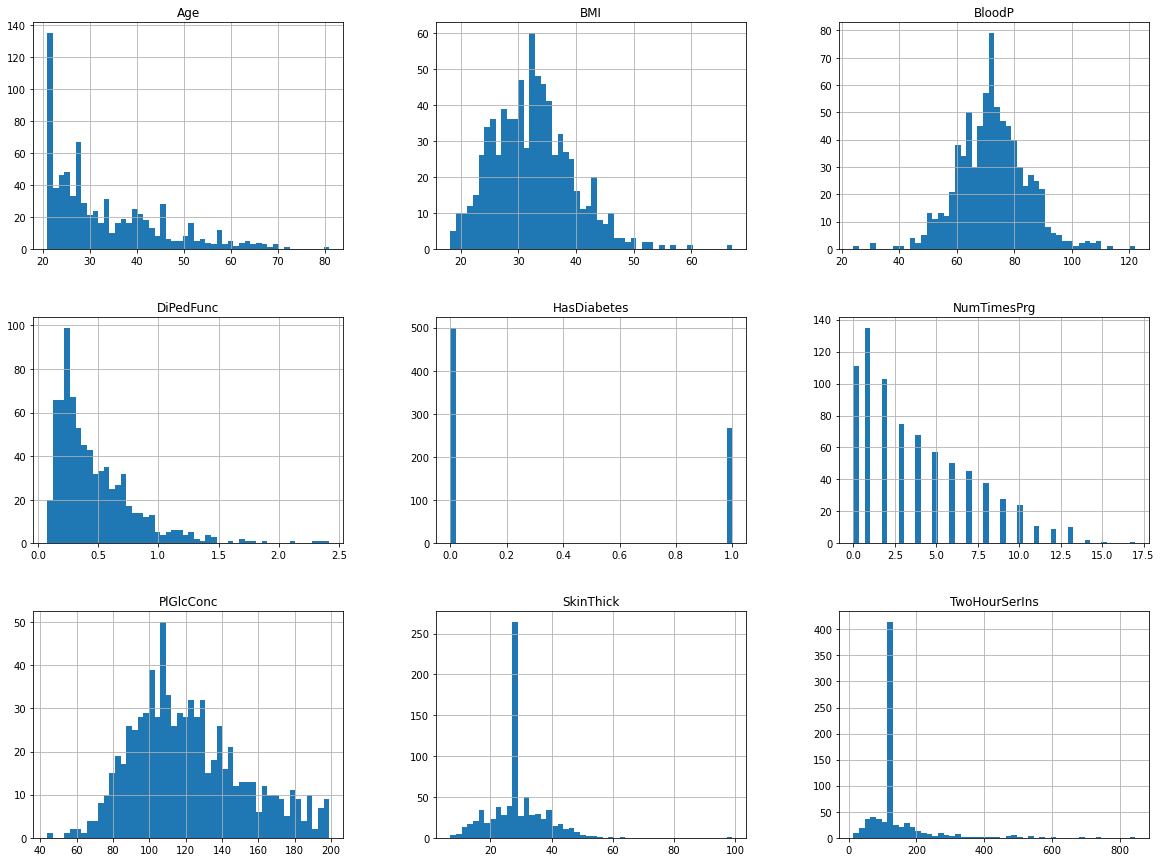

In [12]:
order_columns = df.columns.sort_values()
new_df.hist(column=order_columns, bins=50, figsize=(20,15))
plt.show()

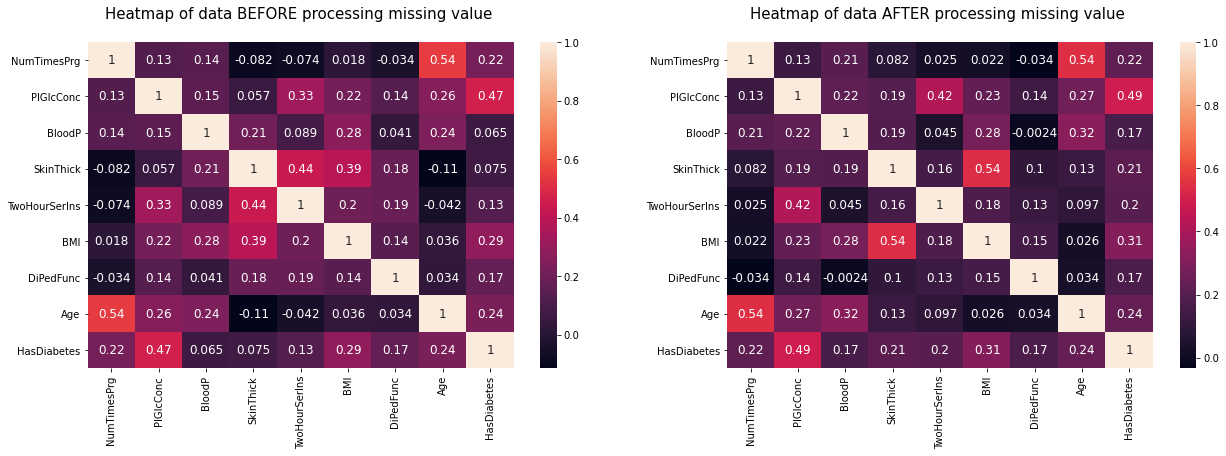

In [13]:
fig= plt.figure(figsize=(21, 6))

ax1 = fig.add_subplot(121)
ax1.set_title("Heatmap of data BEFORE processing missing value \n", fontsize=15)
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":12}, ax=ax1)


ax2 = fig.add_subplot(122)
ax2.set_title("Heatmap of data AFTER processing missing value \n", fontsize=15)
sns.heatmap(new_df.corr(), annot=True, annot_kws={"fontsize":12}, ax=ax2)

plt.show()

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [14]:
y = new_df.HasDiabetes
X = new_df.drop(columns="HasDiabetes")
print(X[0:5],"\n")
print(y[0:5])

   NumTimesPrg  PlGlcConc  BloodP  SkinThick  TwoHourSerIns   BMI  DiPedFunc  \
0            6      148.0    72.0       35.0          125.0  33.6      0.627   
1            1       85.0    66.0       29.0          125.0  26.6      0.351   
2            8      183.0    64.0       29.0          125.0  23.3      0.672   
3            1       89.0    66.0       23.0           94.0  28.1      0.167   
4            0      137.0    40.0       35.0          168.0  43.1      2.288   

   Age  
0   50  
1   31  
2   32  
3   21  
4   33   

0    1
1    0
2    1
3    0
4    1
Name: HasDiabetes, dtype: int64


In [15]:
T = preprocessing.StandardScaler().fit(X).transform(X)
T[0:5]

array([[ 0.63994726,  0.86604475, -0.03198993,  0.67064253, -0.18154124,
         0.16661938,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , -0.01230129, -0.18154124,
        -0.85219976, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, -0.01230129, -0.18154124,
        -1.33250021,  0.60439732, -0.10558415],
       [-0.84488505, -1.07356674, -0.5283186 , -0.69524511, -0.54064177,
        -0.63388137, -0.92076261, -1.04154944],
       [-1.14185152,  0.50442227, -2.67907616,  0.67064253,  0.31656594,
         1.5493025 ,  5.4849091 , -0.0204964 ]])

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size=0.2, stratify=y, random_state=7) 
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:


##### **Trước khi tới bước training, chúng ta nên chuẩn hóa dữ liệu chia tách dữ liệu thành 2 tập train/test là bởi:**
* **Đối với chuẩn hóa dữ liệu:** Thông thường các đặc trưng của tập dữ liệu sẽ có các thang đo khác nhau, có thể có những đặc trưng với khoảng đo lường lớn nhưng cũng có những đặc trưng với khoảng đo lường nhỏ. Nếu giữ nguyên tập dữ liệu và tiến hành training sẽ khiến cho quá trình tính toán trở nên phức tạp, hay quá trình hội tụ sẽ diễn ra chậm hơn khi chạy thuật toán Gradient Descent. Bên cạnh đó, mức độ ảnh hưởng của các đặc trưng đối với mô hình dự đoán cũng khó để xem xét chính xác. Do đó, để tăng tốc độ xử lý cũng như có thể đo lường chính xác hơn ảnh hưởng của các đặc trưng, chúng ta nên chuẩn hóa dữ liệu trước khi tiến hành bước training.

* **Đối với phân tách dữ liệu thành 2 tập train/test:** Chúng ta hoàn toàn có thể training trên toàn bộ tập dữ liệu chúng ta có và có khả năng nhận được một mô hình với độ chính xác cao (khi dự đoán dữ liệu đã training). Tuy vậy, nếu đưa mô hình áp dụng với dữ liệu mới "out-of-sample" luôn, nhiều khả năng chúng ta sẽ nhận được kết quả với độ chính xác thấp bởi trước đó chúng ta chưa biết mô hình sẽ hoạt động trong thực tế ra sao. Việc chia tách tập dữ liệu thành 2 tập dữ liệu train và test (ví dụ như 80/20) giúp chúng ta tránh được điều đó. Sử dụng tập train để training dữ liệu và đưa ra mô hình và tập test để kiểm chứng mô hình cho ta biết được mô hình sẽ hoạt động như thế nào khi đối mặt với dữ liệu nó chưa từng gặp. Nhờ vậy, chúng ta có thể hiểu rõ hơn về mô hình và có thể tìm cách tối ưu các tham số để tim ra mô hình tốt nhất.

### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [17]:
print("The proportion of positive/total women who have diabetes on the full dataset:", y.sum()/y.shape[0])
print("The proportion of positive/total women who have diabetes on the training dataset:", y_train.sum()/y_train.shape[0])
print("The proportion of positive/total women who have diabetes on the testing dataset:", y_test.sum()/y_test.shape[0])

The proportion of positive/total women who have diabetes on the full dataset: 0.3489583333333333
The proportion of positive/total women who have diabetes on the training dataset: 0.3485342019543974
The proportion of positive/total women who have diabetes on the testing dataset: 0.35064935064935066


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [18]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score

In [19]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {"train":{"KNN": 0, "DT": 0, "SVM": 0, "LR": 0, "EN_HARD": 0, "EN_SOFT": 0},
             "test":{"KNN": 0, "DT": 0, "SVM": 0, "LR": 0, "EN_HARD": 0, "EN_SOFT": 0}}
jaccard_scores = {"train":{"KNN": 0, "DT": 0, "SVM": 0, "LR": 0, "EN_HARD": 0, "EN_SOFT": 0}, 
                  "test":{"KNN": 0, "DT": 0, "SVM": 0, "LR": 0, "EN_HARD": 0, "EN_SOFT": 0}}
accuracy_scores = {"train":{"KNN": 0, "DT": 0, "SVM": 0, "LR": 0, "EN_HARD": 0, "EN_SOFT": 0}, 
                  "test":{"KNN": 0, "DT": 0, "SVM": 0, "LR": 0, "EN_HARD": 0, "EN_SOFT": 0}}

# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy (best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
estimator_KNN = KNeighborsClassifier()

parameters_KNN = {"n_neighbors": np.arange(1, 21),
                  "weights": ["uniform", "distance"],
                  "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                  "p": [1, 2, 3, 4, 5],
                  "metric": ["euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis"]
                 }

grid_search_KNN = GridSearchCV(estimator=estimator_KNN,
                               param_grid=parameters_KNN,
                               n_jobs = -1,
                               cv = 5,
                              )

grid_search_KNN.fit(X_train, y_train)

print("The best parameters are", grid_search_KNN.best_params_, "==>", grid_search_KNN.best_estimator_)
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search_KNN.best_score_ *100))

The best parameters are {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 17, 'p': 3, 'weights': 'uniform'} ==> KNeighborsClassifier(n_neighbors=17, p=3)
Accuracy for our training dataset with tuning is : 76.71%


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

### TO DO:


##### **Giải thích các tham số:**
* **n_neighbors:** Số lượng điểm dữ liệu dùng để phân loại điểm dữ liệu cần dự đoán. Đây là các điểm gần nhất với điểm dữ liệu cần dự đoán (xem như "hàng xóm"). Trong n_neighbors gần nhất, nhãn (lablel) có nhiều điểm dữ liệu nhất sẽ là nhãn của điểm dữ liệu cần dự đoán. Lựa chọn số lượng điểm quá ít có thể dẫn tới mô hình bị overfiting (do ảnh hưởng bởi nhiễu), ngược lại lựa chọn quá nhiều điểm dữ liệu có thể dẫn tới mô hình bị underfiting.
* **weights:** Loại trọng số của các điểm dữ liệu dùng để dự đoán - neighbors 
    - **uniform:** Tất cả các neighbors có trọng số như nhau, không kể khoảng cách.
    - **distance:** Các neighbors sẽ có trọng số khác nhau. Điểm càng gần thì trọng số càng lớn, ảnh hưởng mạnh tới việc xác định điểm cần phân loại và ngược lại điểm càng xa, trọng số càng ít, ảnh hướng cũng yếu hơn. Trọng số này được xác định bằng nghịch đảo khoảng cách dữ điểm dữ liệu cần dự đoán và neighbor.
* **algorithm:** Các thuật toán được sử dụng để tính toán các "hàng xóm" gần nhất - neighbors. Bao gồm: "auto", "ball_tree", "kd_tree", "brute".
* **p:** Tham số mũ của công thức tính khoảng cách Minkowski. Khi p = 1, điều này tương đương với việc sử dụng công thức Manhattan và p = 2 tương đương với việc sử dụng công thức Euclidean. Đối với p tùy ý, công thức tổng quát Minkowski được sử dụng.
* **metric:** Công thức/Cách tính, đo lường khoảng cách giữa các điểm. Bao gồm: "euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis".

### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  

In [22]:
KNN_model = grid_search_KNN.best_estimator_
KNN_model.fit(X_train, y_train)
y_train_hat_KNN = KNN_model.predict(X_train)
y_test_hat_KNN = KNN_model.predict(X_test)

print("Predicted labels train: \n", y_train_hat_KNN[0:20])
print("Ground truth train: \n", y_train[0:20].values, "\n")
print("Predicted labels test: \n", y_test_hat_KNN[0:20])
print("Ground truth test: \n", y_test[0:20].values)

Predicted labels train: 
 [1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1]
Ground truth train: 
 [1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0] 

Predicted labels test: 
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
Ground truth test: 
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0]


In [23]:
f1_scores["train"]["KNN"] = f1_score(y_train, y_train_hat_KNN)
f1_scores["test"]["KNN"] = f1_score(y_test, y_test_hat_KNN)

jaccard_scores["train"]["KNN"] = jaccard_score(y_train, y_train_hat_KNN, average="micro")
jaccard_scores["test"]["KNN"] = jaccard_score(y_test, y_test_hat_KNN, average="micro")

accuracy_scores["train"]["KNN"] = accuracy_score(y_train, y_train_hat_KNN)
accuracy_scores["test"]["KNN"] = accuracy_score(y_test, y_test_hat_KNN)

print("f1_scores:", f1_scores, "\n")
print("jaccard_scores:", jaccard_scores, "\n")
print("accuracy_scores:", accuracy_scores)

f1_scores: {'train': {'KNN': 0.67, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6666666666666666, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}} 

jaccard_scores: {'train': {'KNN': 0.646112600536193, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6470588235294118, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}} 

accuracy_scores: {'train': {'KNN': 0.7850162866449512, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7857142857142857, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
estimator_DT = DecisionTreeClassifier()

parameters_DT = { "criterion": ["gini", "entropy"],
                  "max_depth": np.arange(1, 10),
                  "max_leaf_nodes" : np.arange(1, 10),
                  "random_state" : [7]
                 }

grid_search_DT = GridSearchCV(estimator=estimator_DT,
                               param_grid=parameters_DT,
                               n_jobs = -1,
                               cv = 5
                              )

grid_search_DT.fit(X_train, y_train)

print("The best parameters are", grid_search_DT.best_params_, "==>", grid_search_DT.best_estimator_)
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search_DT.best_score_ *100))

The best parameters are {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8, 'random_state': 7} ==> DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=8,
                       random_state=7)
Accuracy for our training dataset with tuning is : 73.77%


In [26]:
DT_model = grid_search_DT.best_estimator_
DT_model.fit(X_train, y_train)
y_train_hat_DT = DT_model.predict(X_train)
y_test_hat_DT = DT_model.predict(X_test)

print("Predicted labels train: \n", y_train_hat_DT[0:20])
print("Ground truth train: \n", y_train[0:20].values, "\n")

print("Predicted labels test: \n", y_test_hat_DT[0:20])
print("Ground truth test: \n", y_test[0:20].values)

Predicted labels train: 
 [1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0]
Ground truth train: 
 [1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0] 

Predicted labels test: 
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0]
Ground truth test: 
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0]


In [27]:
f1_scores["train"]["DT"] = f1_score(y_train, y_train_hat_DT)
f1_scores["test"]["DT"] = f1_score(y_test, y_test_hat_DT)

jaccard_scores["train"]["DT"] = jaccard_score(y_train, y_train_hat_DT, average="micro")
jaccard_scores["test"]["DT"] = jaccard_score(y_test, y_test_hat_DT, average="micro")

accuracy_scores["train"]["DT"] = accuracy_score(y_train, y_train_hat_DT)
accuracy_scores["test"]["DT"] = accuracy_score(y_test, y_test_hat_DT)

print("f1_scores:", f1_scores, "\n")
print("jaccard_scores:", jaccard_scores, "\n")
print("accuracy_scores:", accuracy_scores)

f1_scores: {'train': {'KNN': 0.67, 'DT': 0.6604215456674473, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6666666666666666, 'DT': 0.627450980392157, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}} 

jaccard_scores: {'train': {'KNN': 0.646112600536193, 'DT': 0.6179183135704874, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6470588235294118, 'DT': 0.6041666666666666, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}} 

accuracy_scores: {'train': {'KNN': 0.7850162866449512, 'DT': 0.7638436482084691, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7857142857142857, 'DT': 0.7532467532467533, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


In [28]:
from sklearn import tree

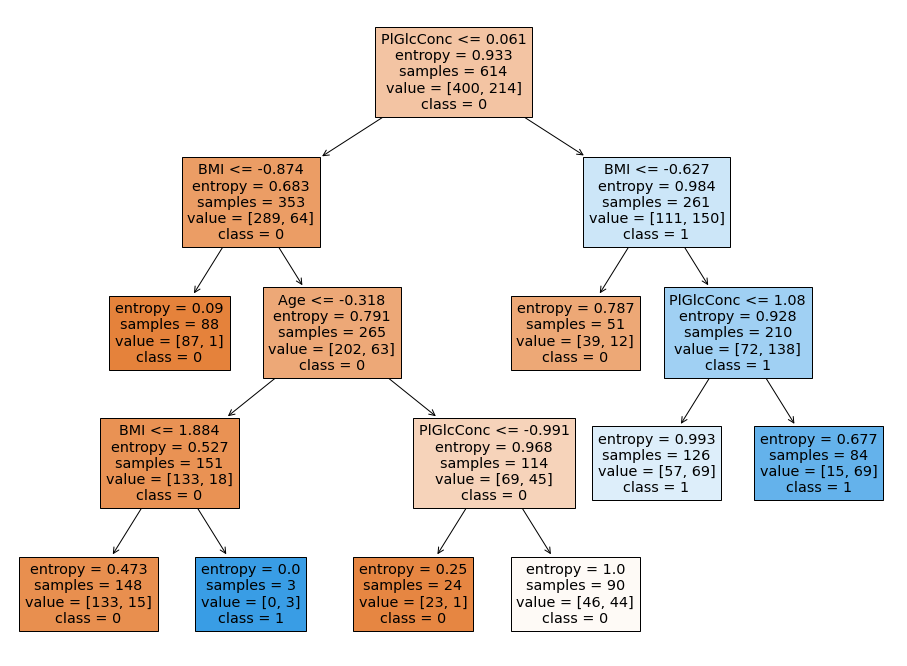

In [29]:
plt.figure(figsize=(16,12))
tree.plot_tree(DT_model, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


##### **Giải thích các tham số:**
* **criterion:** Các hàm giúp đo lường chất lượng của một lần phân tách (split) ở mỗi node. Bao gồm: "gini", "entropy". Gini, Entropy càng thấp thì dữ liệu càng tinh khiết (purity) và ngược lại Gini, Entropy càng cao thì dữ liệu càng vẩn đục (impurity).
* **max_depth:** Chiều sâu tối đa của cây, có thể thiết lập một số cụ thể còn nếu để "None" mặc định, cây sẽ tự mở rộng cho đến khi tất cả các lá đều thuần túy (pure) hoặc cho đến khi tất cả các lá chứa ít hơn mẫu min_samples_split (nếu thiết lập tham số này).
* **max_leaf_nodes:** Số nút lá tối đa cây có thể có. Nếu để "None" mặc định, cây sẽ không giới hạn số nút lá.
* **random_state:** Tham số để kiểm soát sự ngẫu nhiên của công cụ ước tính. Tham số này là một số nguyên. Các đặc trưng của dữ liệu luôn được hoán vị ngẫu nhiên ở mỗi lần tách, ngay cả khi "splitter" được đặt thành "best". Do đó, cần thiết lập tham số này để giữ được kết quả tính toán không bị thay đổi trong các lần chạy sau.

# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

In [30]:
from sklearn.svm import SVC

In [31]:
estimator_SVM = SVC()

parameters_SVM = {"C": [0.1, 1, 10, 100, 1000],
                  "kernel": ["linear", "rbf", "sigmoid"],
                  "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
                  "probability": [True]
                 }

grid_search_SVM = GridSearchCV(estimator=estimator_SVM,
                               param_grid=parameters_SVM,
                               scoring = "accuracy",
                               n_jobs = -1,
                               cv = 5
                              )

grid_search_SVM.fit(X_train, y_train)

print("The best parameters are", grid_search_SVM.best_params_, "==>", grid_search_SVM.best_estimator_)
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search_SVM.best_score_ *100))

The best parameters are {'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True} ==> SVC(C=10, gamma=0.001, probability=True)
Accuracy for our training dataset with tuning is : 76.71%


In [32]:
SVM_model = grid_search_SVM.best_estimator_
SVM_model.fit(X_train, y_train)
y_train_hat_SVM = SVM_model.predict(X_train)
y_test_hat_SVM = SVM_model.predict(X_test)

print("Predicted labels train: \n", y_train_hat_SVM[0:20])
print("Ground truth train: \n", y_train[0:20].values, "\n")

print("Predicted labels test: \n", y_test_hat_SVM[0:20])
print("Ground truth test: \n", y_test[0:20].values)

Predicted labels train: 
 [0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0]
Ground truth train: 
 [1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0] 

Predicted labels test: 
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0]
Ground truth test: 
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0]


In [33]:
f1_scores["train"]["SVM"] = f1_score(y_train, y_train_hat_SVM)
f1_scores["test"]["SVM"] = f1_score(y_test, y_test_hat_SVM)

jaccard_scores["train"]["SVM"] = jaccard_score(y_train, y_train_hat_SVM, average="micro")
jaccard_scores["test"]["SVM"] = jaccard_score(y_test, y_test_hat_SVM, average="micro")

accuracy_scores["train"]["SVM"] = accuracy_score(y_train, y_train_hat_SVM)
accuracy_scores["test"]["SVM"] = accuracy_score(y_test, y_test_hat_SVM)

print("f1_scores:", f1_scores, "\n")
print("jaccard_scores:", jaccard_scores, "\n")
print("accuracy_scores:", accuracy_scores)

f1_scores: {'train': {'KNN': 0.67, 'DT': 0.6604215456674473, 'SVM': 0.5977653631284916, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6666666666666666, 'DT': 0.627450980392157, 'SVM': 0.6382978723404256, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}} 

jaccard_scores: {'train': {'KNN': 0.646112600536193, 'DT': 0.6179183135704874, 'SVM': 0.6200527704485488, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6470588235294118, 'DT': 0.6041666666666666, 'SVM': 0.6382978723404256, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}} 

accuracy_scores: {'train': {'KNN': 0.7850162866449512, 'DT': 0.7638436482084691, 'SVM': 0.7654723127035831, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7857142857142857, 'DT': 0.7532467532467533, 'SVM': 0.7792207792207793, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


##### **Giải thích các tham số:**
* **C:** Tham số chính quy giúp điều chỉnh mô hình tránh khỏi overfiting do gặp phải một điểm dữ liệu nhiễu khiến đường phân chia/hyperlane bị ảnh hưởng. Thiết lập C nhỏ sẽ khiến biên (margin) giữa 2 lớp với đường phân chia/hyperlane lớn hơn nhưng đồng thời cũng chấp nhận sai lệch nhỏ. Ngược lại thiết lập C lớn sẽ khiến biên (margin) giữa 2 lớp với đường phân chia/hyperlane nhỏ hơn, phân tách chính xác nhiều điểm hơn trong tập train nhưng rủi ro cao hơn, dễ dự đoán sai khi gặp phải dữ liệu mới.
* **kernel:** Là cách thức để chuyển dữ liệu từ chiều không gian ban đầu sang chiều không gian khác sao cho các lớp có thể phân tách tuyến tính. Bao gồm: "linear", "rbf", "sigmoid", "poly", "precomputed".
* **gamma:** Là các hệ số Kernel cho "rbf", "sigmoid", "poly".
* **probability:** Tham số được dùng để bặt tắt việc ước lượng xác suất bằng cách thiết lập "True"/"False". Trong "parameters_SV", thiết lập "probability" là "True" để sử dụng trong mô hình Ensemble Soft Voting.

# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
estimator_LR = LogisticRegression()

parameters_LR = {"penalty": ["l1", "l2", "elasticnet", "none"],
                 "C": [0.1, 1, 10, 100, 1000],
                 "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                 "max_iter" : [100, 500, 1000, 1500, 2000, 3000, 5000, 10000]
                 }

grid_search_LR = GridSearchCV(estimator=estimator_LR,
                               param_grid=parameters_LR,
                               scoring = "accuracy",
                               n_jobs = -1,
                               cv = 5
                              )

grid_search_LR.fit(X_train, y_train)

print("The best parameters are", grid_search_LR.best_params_, "==>", grid_search_LR.best_estimator_)
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search_LR.best_score_ *100))

The best parameters are {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} ==> LogisticRegression(C=1, penalty='l1', solver='liblinear')
Accuracy for our training dataset with tuning is : 76.05%


In [36]:
LR_model = grid_search_LR.best_estimator_
LR_model.fit(X_train, y_train)
y_train_hat_LR = LR_model.predict(X_train)
y_test_hat_LR = LR_model.predict(X_test)

print("Predicted labels train: \n", y_train_hat_LR[0:20])
print("Ground truth train: \n", y_train[0:20].values, "\n")

print("Predicted labels test: \n", y_test_hat_LR[0:20])
print("Ground truth test: \n", y_test[0:20].values)

Predicted labels train: 
 [0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0]
Ground truth train: 
 [1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0] 

Predicted labels test: 
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0]
Ground truth test: 
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0]


In [37]:
f1_scores["train"]["LR"] = f1_score(y_train, y_train_hat_LR)
f1_scores["test"]["LR"] = f1_score(y_test, y_test_hat_LR)

jaccard_scores["train"]["LR"] = jaccard_score(y_train, y_train_hat_LR, average="micro")
jaccard_scores["test"]["LR"] = jaccard_score(y_test, y_test_hat_LR, average="micro")

accuracy_scores["train"]["LR"] = accuracy_score(y_train, y_train_hat_LR)
accuracy_scores["test"]["LR"] = accuracy_score(y_test, y_test_hat_LR)

print("f1_scores:", f1_scores, "\n")
print("jaccard_scores:", jaccard_scores, "\n")
print("accuracy_scores:", accuracy_scores)

f1_scores: {'train': {'KNN': 0.67, 'DT': 0.6604215456674473, 'SVM': 0.5977653631284916, 'LR': 0.619047619047619, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6666666666666666, 'DT': 0.627450980392157, 'SVM': 0.6382978723404256, 'LR': 0.6666666666666667, 'EN_HARD': 0, 'EN_SOFT': 0}} 

jaccard_scores: {'train': {'KNN': 0.646112600536193, 'DT': 0.6179183135704874, 'SVM': 0.6200527704485488, 'LR': 0.6200527704485488, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6470588235294118, 'DT': 0.6041666666666666, 'SVM': 0.6382978723404256, 'LR': 0.6382978723404256, 'EN_HARD': 0, 'EN_SOFT': 0}} 

accuracy_scores: {'train': {'KNN': 0.7850162866449512, 'DT': 0.7638436482084691, 'SVM': 0.7654723127035831, 'LR': 0.7654723127035831, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7857142857142857, 'DT': 0.7532467532467533, 'SVM': 0.7792207792207793, 'LR': 0.7792207792207793, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


##### **Giải thích các tham số:**
* **penalty:** Là loại chính quy được thêm vào.
    - "l1" regularization: thêm vào Loss funtion tổng các giá trị tuyệt đối của các hệ số.
    - "l2" regularization: thêm vào Loss funtion tổng các bình phương của các hệ số.
    - "elasticnetelasticnet" regularization: Kết hợp giữa "l1" và "l2".
* **C:** Nghịch đảo của hệ số chính quy λ, C = 1/λ. C càng nhỏ thì mô hình càng dễ bị high bias - underfiting. C càng lớn thì mô hình càng dễ bị high variance - overfiting.
* **solver:** Các thuật toán được sử dụng để tối ưu vấn đề. Bao gồm: "newton-cg", "lbfgs", "liblinear", "sag", "saga"
* **max_iter:** Số vòng lặp lớn nhất để thuật toán ở solver hội tụ

# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [38]:
from sklearn.ensemble import VotingClassifier

In [39]:
#create a list of our models
estimators_VC = [("KNN", KNN_model), ("DT", DT_model), ("SVM", SVM_model), ("LR", LR_model)]
#create our voting classifier, inputting our models
SV_model = VotingClassifier(estimators=estimators_VC, voting="soft")
SV_model.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=17, p=3)),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     max_leaf_nodes=8,
                                                     random_state=7)),
                             ('SVM', SVC(C=10, gamma=0.001, probability=True)),
                             ('LR',
                              LogisticRegression(C=1, penalty='l1',
                                                 solver='liblinear'))],
                 voting='soft')

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.

In [40]:
y_train_hat_SV = SV_model.predict(X_train)
y_test_hat_SV = SV_model.predict(X_test)

print("Predicted labels train: \n", y_train_hat_SV[0:20])
print("Ground truth train: \n", y_train[0:20].values, "\n")

print("Predicted labels test: \n", y_test_hat_SV[0:20])
print("Ground truth test: \n", y_test[0:20].values)

Predicted labels train: 
 [1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0]
Ground truth train: 
 [1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0] 

Predicted labels test: 
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0]
Ground truth test: 
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0]


In [41]:
f1_scores["train"]["EN_SOFT"] = f1_score(y_train, y_train_hat_SV)
f1_scores["test"]["EN_SOFT"] = f1_score(y_test, y_test_hat_SV)

jaccard_scores["train"]["EN_SOFT"] = jaccard_score(y_train, y_train_hat_SV, average="micro")
jaccard_scores["test"]["EN_SOFT"] = jaccard_score(y_test, y_test_hat_SV, average="micro")

accuracy_scores["train"]["EN_SOFT"] = accuracy_score(y_train, y_train_hat_SV)
accuracy_scores["test"]["EN_SOFT"] = accuracy_score(y_test, y_test_hat_SV)

print("f1_scores:", f1_scores, "\n")
print("jaccard_scores:", jaccard_scores, "\n")
print("accuracy_scores:", accuracy_scores)

f1_scores: {'train': {'KNN': 0.67, 'DT': 0.6604215456674473, 'SVM': 0.5977653631284916, 'LR': 0.619047619047619, 'EN_HARD': 0, 'EN_SOFT': 0.6437994722955144}, 'test': {'KNN': 0.6666666666666666, 'DT': 0.627450980392157, 'SVM': 0.6382978723404256, 'LR': 0.6666666666666667, 'EN_HARD': 0, 'EN_SOFT': 0.6938775510204083}} 

jaccard_scores: {'train': {'KNN': 0.646112600536193, 'DT': 0.6179183135704874, 'SVM': 0.6200527704485488, 'LR': 0.6200527704485488, 'EN_HARD': 0, 'EN_SOFT': 0.6395193591455274}, 'test': {'KNN': 0.6470588235294118, 'DT': 0.6041666666666666, 'SVM': 0.6382978723404256, 'LR': 0.6382978723404256, 'EN_HARD': 0, 'EN_SOFT': 0.6739130434782609}} 

accuracy_scores: {'train': {'KNN': 0.7850162866449512, 'DT': 0.7638436482084691, 'SVM': 0.7654723127035831, 'LR': 0.7654723127035831, 'EN_HARD': 0, 'EN_SOFT': 0.7801302931596091}, 'test': {'KNN': 0.7857142857142857, 'DT': 0.7532467532467533, 'SVM': 0.7792207792207793, 'LR': 0.7792207792207793, 'EN_HARD': 0, 'EN_SOFT': 0.8051948051948052

### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

In [42]:
#create a list of our models
estimators_VC = [("KNN", KNN_model), ("DT", DT_model), ("LR", LR_model)]  
#create our voting classifier, inputting our models
HV_model = VotingClassifier(estimators=estimators_VC, voting="hard")
HV_model.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=17, p=3)),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     max_leaf_nodes=8,
                                                     random_state=7)),
                             ('LR',
                              LogisticRegression(C=1, penalty='l1',
                                                 solver='liblinear'))])

In [43]:
y_train_hat_HV = HV_model.predict(X_train)
y_test_hat_HV = HV_model.predict(X_test)

print("Predicted labels train: \n", y_train_hat_SV[0:20])
print("Ground truth train: \n", y_train[0:20].values, "\n")

print("Predicted labels test: \n", y_test_hat_SV[0:20])
print("Ground truth test: \n", y_test[0:20].values)

Predicted labels train: 
 [1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0]
Ground truth train: 
 [1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0] 

Predicted labels test: 
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0]
Ground truth test: 
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0]


In [44]:
f1_scores["train"]["EN_HARD"] = f1_score(y_train, y_train_hat_HV)
f1_scores["test"]["EN_HARD"] = f1_score(y_test, y_test_hat_HV)

jaccard_scores["train"]["EN_HARD"] = jaccard_score(y_train, y_train_hat_HV, average="micro")
jaccard_scores["test"]["EN_HARD"] = jaccard_score(y_test, y_test_hat_HV, average="micro")

accuracy_scores["train"]["EN_HARD"] = accuracy_score(y_train, y_train_hat_HV)
accuracy_scores["test"]["EN_HARD"] = accuracy_score(y_test, y_test_hat_HV)

print("f1_scores:", f1_scores, "\n")
print("jaccard_scores:", jaccard_scores, "\n")
print("accuracy_scores:", accuracy_scores)

f1_scores: {'train': {'KNN': 0.67, 'DT': 0.6604215456674473, 'SVM': 0.5977653631284916, 'LR': 0.619047619047619, 'EN_HARD': 0.6632390745501286, 'EN_SOFT': 0.6437994722955144}, 'test': {'KNN': 0.6666666666666666, 'DT': 0.627450980392157, 'SVM': 0.6382978723404256, 'LR': 0.6666666666666667, 'EN_HARD': 0.68, 'EN_SOFT': 0.6938775510204083}} 

jaccard_scores: {'train': {'KNN': 0.646112600536193, 'DT': 0.6179183135704874, 'SVM': 0.6200527704485488, 'LR': 0.6200527704485488, 'EN_HARD': 0.6483221476510067, 'EN_SOFT': 0.6395193591455274}, 'test': {'KNN': 0.6470588235294118, 'DT': 0.6041666666666666, 'SVM': 0.6382978723404256, 'LR': 0.6382978723404256, 'EN_HARD': 0.6559139784946236, 'EN_SOFT': 0.6739130434782609}} 

accuracy_scores: {'train': {'KNN': 0.7850162866449512, 'DT': 0.7638436482084691, 'SVM': 0.7654723127035831, 'LR': 0.7654723127035831, 'EN_HARD': 0.7866449511400652, 'EN_SOFT': 0.7801302931596091}, 'test': {'KNN': 0.7857142857142857, 'DT': 0.7532467532467533, 'SVM': 0.7792207792207793

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [45]:
result = {"Jaccard-training": jaccard_scores["train"], "F1-score-training": f1_scores["train"], "Accuracy-score-training": accuracy_scores["train"], \
          "Jaccard-testing": jaccard_scores["test"], "F1-score-testing": f1_scores["test"], "Accuracy-score-testing": accuracy_scores["test"]}
result_df = pd.DataFrame(result)
result_df.index.name = "Algorithm"
result_df.reset_index(inplace=True)
result_df["Algorithm"] = ["KNN", "Decision Tree", "SVM", "Logistic Regression", "Hard Voting", "Soft Voting"]
result_df

,Algorithm,Jaccard-training,F1-score-training,Accuracy-score-training,Jaccard-testing,F1-score-testing,Accuracy-score-testing
0,KNN,0.646113,0.670000,0.785016,0.647059,0.666667,0.785714
1,Decision Tree,0.617918,0.660422,0.763844,0.604167,0.627451,0.753247
2,SVM,0.620053,0.597765,0.765472,0.638298,0.638298,0.779221
3,Logistic Regression,0.620053,0.619048,0.765472,0.638298,0.666667,0.779221
4,Hard Voting,0.648322,0.663239,0.786645,0.655914,0.680000,0.792208
5,Soft Voting,0.639519,0.643799,0.780130,0.673913,0.693878,0.805195


In [46]:
result_df.drop(columns=["Accuracy-score-training", "Accuracy-score-testing"])

,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,0.646113,0.670000,0.647059,0.666667
1,Decision Tree,0.617918,0.660422,0.604167,0.627451
2,SVM,0.620053,0.597765,0.638298,0.638298
3,Logistic Regression,0.620053,0.619048,0.638298,0.666667
4,Hard Voting,0.648322,0.663239,0.655914,0.680000
5,Soft Voting,0.639519,0.643799,0.673913,0.693878


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:


Ensemble method là phương pháp kết hợp các model khác nhau, bổ khuyết các điểm yếu của nhau để cho ra một model mạnh mẽ và hài hòa hơn, ví dụ như một model bị high variance với một model bị high bias. Tuy vậy không phải lúc nào ensemble model cũng tốt hơn single model bởi nếu kết hợp các model tương tự như nhau chưa chắc đã sinh ra một model mới tốt hơn, ví dụ như một model bị high variance với một model bị high variance. Hay với Voting Classifier, nếu kết hợp một model mạnh với nhiều models yếu, các models yếu sẽ chiếm lợi thế trong việc vote, dẫn tới sinh ra một model chưa tốt bằng so với model mạnh kia.